# Métodos Não Paramétricos

Neste   capítulo   vamos estudarmétodos estatísticos   não paramétricos, que   são alternativas quando as suposições dos métodos paramétricos não são atendidas.

### O que são testes Não Paramétricos?

Testes estatísticos não paramétricos são métodos de análise que não assumem uma distribuição específica dos dados, como a normalidade, que é frequentemente uma suposição em testes paramétricos.

Eles são particularmente úteis quando você tem dados que não atendem às suposições necessárias para os testes paramétricos, como dados com distribuições desconhecidas, dados ordinais ou dados com muitos valores atípicos.

Esses testes são baseados na ordem ou no ranking dos dados, em vez de seus valores exatos. Isso os torna robustos contra desvios de distribuições específicas e minimiza o impacto de outliers.

Alguns dos testes não paramétricos mais conhecidos incluem o teste de Wilcoxon, o teste de Mann-Whitney, o teste de Kruskal-Wallis e o teste de Friedman, além do coeficiente de correlação de Spearman. Esses testes são aplicados em diversas situações, como comparar medianas de dois ou mais grupos, testar hipóteses sobre a associação entre variáveis categóricas, entre outras aplicações.

## Quando Usar Testes Não Paramétricos?

Testes não paramétricos são uma ferramenta estatística essencial que você pode usar em diversas situações onde os testes paramétricos podem não ser adequados. Aqui estão alguns dos principais cenários e considerações para decidir quando usar testes não paramétricos:

**1. Distribuição dos Dados**

Quando os dados não seguem uma distribuição normal (ou qualquer outra distribuição específica assumida por testes paramétricos), os testes não paramétricos são uma opção viável. Isso é comum com amostras pequenas, onde é difícil verificar a normalidade, ou com dados que são claramente assimétricos ou têm outliers significativos.

**2. Tamanho da Amostra**

Testes não paramétricos são particularmente úteis em situações com amostras pequenas. Eles não dependem do Teorema Central do Limite, que é a base para muitos testes paramétricos que assumem uma distribuição normal nas amostras maiores. Assim, para amostras pequenas, testes não paramétricos podem fornecer análises mais confiáveis.

**3. Nível de Medida dos Dados**

Quando os dados são ordinais ou nominais (categóricos), os testes não paramétricos são geralmente necessários, pois os testes paramétricos geralmente requerem dados de intervalo ou de razão (numéricos) que suportem operações aritméticas como média e desvio padrão.

**4. Robustez contra Violações de Suposições**

Testes não paramétricos não são tão sensíveis a outliers e outros tipos de violações de suposições como homogeneidade de variâncias (homocedasticidade) que são críticas para testes paramétricos. Se você suspeita que seus dados podem violar essas suposições, os testes não paramétricos podem fornecer resultados mais confiáveis.

**5. Modelagem de Dados**

Em análises onde a forma funcional da relação entre variáveis não é conhecida ou é muito complexa, os métodos não paramétricos podem fornecer modelos flexíveis sem a necessidade de especificar uma forma funcional a priori, como é o caso da regressão não paramétrica (que aplicaremos no Projeto 9 do curso).

In [3]:
!pip install -q scikit-posthocs

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import spearmanr
from scipy.stats import shapiro

## Teste de Wilcoxon

O teste de Wilcoxon é uma alternativa não paramétrica ao teste t. Ele é usado para comparar duas amostras relacionadas quando não se pode assumir que a diferença entre as amostras segue uma distribuição normal. 

Vejamos um exemplo. Temos amostras de tamanhos de plantas antes e depois do uso de fertilizantes. Não conhecemos a distribuição dos dados.

In [18]:
# Gerando dados que não seguem uma distribuição normal

# Para reprodutibilidade
np.random.seed(297)  

# Dados antes de usar fertilizante
# Utilizando uma distribuição exponencial, comumente usada para modelar tempos de espera
dados_antes = np.random.exponential(scale = 10, size = 10) + 15  

# Dados depois de usar fertilizante
# Utilizando uma mistura de distribuições para aumentar a assimetria
dados_depois = np.concatenate([np.random.exponential(scale = 15, size = 5),  
                               np.random.exponential(scale = 5, size = 5)]) + 20  

# Adicionando um pequeno ruído para evitar zeros nas diferenças
ruido = np.random.normal(0, 0.01, size = dados_antes.shape)
dados_depois_modificados = dados_depois + ruido

In [19]:
# Teste de Shapiro-Wilk para verificar a normalidade
stat_A, p_A = shapiro(dados_antes)
stat_B, p_B = shapiro(dados_depois_modificados)

print(f"Amostra A - Estatística: {stat_A:.4f}, p-valor: {p_A:.4f}")
print(f"Amostra B- Estatística: {stat_B:.4f}, p-valor: {p_B:.4f}")

Amostra A - Estatística: 0.7869, p-valor: 0.0101
Amostra B- Estatística: 0.6200, p-valor: 0.0001


In [20]:
# Interpretando os resultados do Teste de Shapiro-Wilk

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.")

Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra A.
Há evidências suficientes para rejeitar a hipótese de normalidade para a amostra B.


In [21]:
# Aplicação do teste de Wilcoxon
stat, p = wilcoxon(dados_antes, dados_depois_modificados)

O teste de Wilcoxon testa duas hipóteses sobre as diferenças entre os pares de observações nas duas amostras relacionadas. Aqui estão as hipóteses:

**Hipótese Nula (H0)**: Não há diferença mediana entre os pares de grupos. Isso significa que a mediana das diferenças entre os pares de amostras é zero. Em termos mais técnicos, a hipótese nula afirma que a distribuição da diferença entre os pares é simétrica em torno de zero.

**Hipótese Alternativa (H1 ou Ha)**: Existe uma diferença mediana entre os pares de grupos. A mediana das diferenças entre os pares de amostras não é zero, indicando que uma das amostras tende a ter valores maiores ou menores que a outra. Esta hipótese pode ser bidirecional (simplesmente indicando que as medianas são diferentes) ou unidirecional (especificando se a mediana da primeira amostra é maior ou menor que a da segunda).

In [22]:
print("Estatística do Teste:", stat)
print("Valor-p:", p)

Estatística do Teste: 21.0
Valor-p: 0.556640625


In [24]:
# Interpretação do resultado
if p > 0.05:
    print("Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).")
    print("Logo, não há difSerença significativa no tamanho das amostras.")
else:
    print("Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).")

Não há evidências suficientes para rejeitar a hipótese nula (as medianas provavelmente são iguais).
Logo, não há diferença significativa no tamanho das amostras.


## Teste Mann-Whitney

O Teste Mann-Whitney, também conhecido como Teste U de Mann-Whitney, é um teste estatístico  não  paramétrico  que  é  utilizado  para  comparar  duas  amostras  independentes.
Alternativa a ANOVA.

### Exemplo 1

Neste exemplo, geramos duas amostras hipotéticas (amostra1 e amostra2) e aplicamos o Teste Mann-Whitney utilizando a função mannwhitneyu da biblioteca SciPy. O resultado inclui a estatística U e o valor-p. O valor-p é utilizado para determinar se há diferença significativa entre as distribuições das duas amostras. 

Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que as distribuições das duas amostras são significativamente diferentes. Caso contrário, não se pode rejeitar a hipótese nula.

Hipóteses:
- H0: Não há diferença significativa entre as distribuições das amostras
- H1: As distribuições das amostras são significativamente diferentes

In [35]:
# Exemplo de duas amostras independentes
amostra1 = np.array([3, 5, 7, 9, 11, 15, 18, 21])
amostra2 = np.array([1, 4, 6, 8, 10, 12, 14, 16])

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística U: 38.0
Valor-p: 0.5737373737373737


**Conclusão:** O valor-p é maior que o nível de significância (0,05), logo falhamos em rejeitar a H0. Não há diferença significativa entre as distribuições das amostras.

### Exemplo 2

Neste exemplo, geramos duas amostras com distribuições normais distintas: amostra1 possui média 10 e desvio padrão 3, enquanto amostra 2 possui média 14 e desvio padrão 2.
Em seguida, aplicamos o **Teste Mann-Whitney** utilizando a função `mannwhitneyu` e exibimos os resultados.

O valor-p resultante do Teste Mann-Whitney pode ser usado para avaliar se as duas amostras têm distribuições significativamente diferentes, considerando um nível de significância pré-estabelecido (como 0,05). Se o valor-p for menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que as distribuições são significativamente diferentes.

Hipóteses:
 - H0: Não há diferença significativa entre as distribuições das amostras
 - H1: As distribuições das amostras são significativamente diferentes

In [33]:
# Gera duas amostras com distribuições diferentes
np.random.seed(29)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 50)
amostra2 = np.random.normal(loc = 14, scale = 2, size = 60)

# Realiza o Teste Mann-Whitney
resultado = mannwhitneyu(amostra1, amostra2)

# Exibe o resultado
print("Estatística U:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística U: 530.0
Valor-p: 5.887908229286127e-09


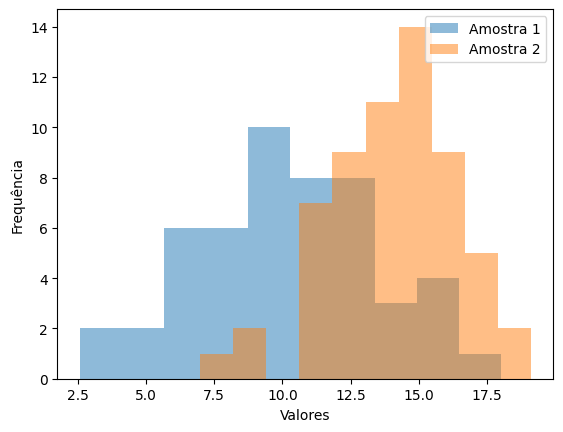

In [34]:
# Visualiza as distribuições das amostras
plt.hist(amostra1, bins = 10, alpha = 0.5, label = "Amostra 1")
plt.hist(amostra2, bins = 10, alpha = 0.5, label = "Amostra 2")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc="upper right")
plt.show()

**Conclusão:** O valor-p é menor que o nível de significância, logo podemos rejeitar a H0. As distribuições das amostras são significativamente diferentes.

## Teste Kruskal-Wallis

O teste de Kruskal-Wallis é um exemplo de teste não paramétrico usado como alternativa à ANOVA. Ele compara as distribuições de três ou mais grupos independentes, semelhante ao teste de Mann-Whitney. O teste de Kruskal-Wallis não assume normalidade dos dados nem homocedasticidade, tornando-se uma opção mais robusta em comparação à ANOVA quando as suposições não são atendidas.

### Exemplo 1

Neste exemplo, utilizamos três amostras hipotéticas e aplicamos o Teste de Kruskal-Wallis usando a função kruskal da biblioteca SciPy. O resultado inclui a estatística H e o valor-p. O valor-p é utilizado para determinar se há diferença significativa entre as distribuições das amostras. Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que as distribuições das amostras são significativamente diferentes. Caso contrário, não se pode rejeitar a hipótese nula.

Hipóteses:
 - H0: Não há diferença significativa entre as distribuições das amostras
 - H1: As distribuições das amostras são significativamente diferentes

In [36]:
# Exemplo de três amostras independentes
amostra1 = np.array([3, 5, 7, 9, 11, 15, 18, 21])
amostra2 = np.array([1, 4, 6, 8, 10, 12, 14, 16])
amostra3 = np.array([2, 3, 5, 7, 11, 13, 17, 19])

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)

# Exibe o resultado
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

Estatística H: 0.48584494773519105
Valor-p: 0.784332317665689


**Conclusão:** O valor-p é maior que o nível de significância, logo não podemos rejeitar a H0. Não há diferença significativa entre as distribuições das amostras.

### Exemplo 2

Neste exemplo, geramos três amostras com distribuições normais distintas: amostra1 possui média 10 e desvio padrão 3, amostra2 possui média 15 e desvio padrão 2, e amostra3 possui média 18 e desvio padrão 4. Em seguida, aplicamos o Teste de Kruskal-Wallis utilizando a função kruskal e exibimos os resultados.

Além disso, usamos a biblioteca Matplotlib para criar um histograma das três amostras, a fim de visualizar as distribuições e verificar se são distintas.

O valor-p resultante do Teste de Kruskal-Wallis pode ser usado para avaliar se as três amostras têm distribuições significativamente diferentes, considerando um nível de significância preestabelecido (como 0,05). Se o valor-p for menor que o nível de significância, rejeita-se a hipótese nula e conclui-se que as distribuições são significativamente diferentes.

Estatística H: 46.29962264150947
Valor-p: 8.834148315319018e-11


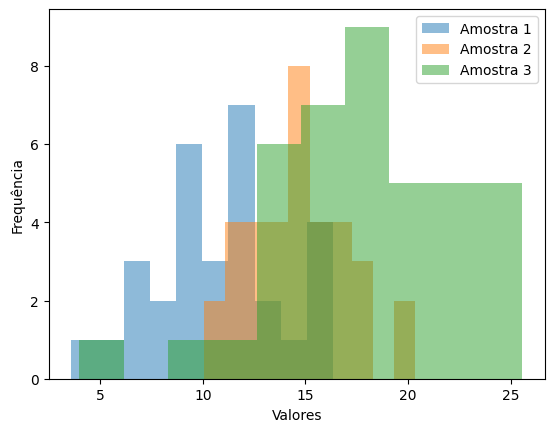

In [37]:
# Gera três amostras com distribuições diferentes
np.random.seed(29)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 30)
amostra2 = np.random.normal(loc = 15, scale = 2, size = 35)
amostra3 = np.random.normal(loc = 18, scale = 4, size = 40)

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)

# Exibe o resultado
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Visualiza as distribuições das amostras
plt.hist(amostra1, bins = 10, alpha = 0.5, label = "Amostra 1")
plt.hist(amostra2, bins = 10, alpha = 0.5, label = "Amostra 2")
plt.hist(amostra3, bins = 10, alpha = 0.5, label = "Amostra 3")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend(loc = "upper right")
plt.show()

**Conclusão 2:** O valor-p é menor que o nível de significância, logo podemos rejeitar a H0. As distribuições das amostras, provavelmente, são diferentes.

## Teste de Dunn

O teste de Dunn é um teste estatístico não paramétrico usado para análise post-hoc após um teste de Kruskal-Wallis. Quando o teste de Kruskal-Wallis rejeita a hipótese nula, indicando diferenças significativas entre três ou mais grupos, o teste de Dunn é usado para identificar quais pares de grupos têm diferenças significativas. O teste de Dunn é uma alternativa ao teste de comparações múltiplas de Tukey (HSD) usado na análise post-hoc após ANOVA.

### Exemplo

Neste exemplo, geramos três amostras com distribuições normais distintas e realizamos o Teste de Kruskal-Wallis. Se o resultado do Teste de Kruskal-Wallis rejeitar a hipótese nula (valor-p < 0,05), prosseguimos com o Teste de Dunn usando a função posthoc_dunn da biblioteca scikit-posthocs.

O resultado do teste de Dunn é uma matriz que mostra os valores-p corrigidos para cada par de comparações entre os grupos. A correção de Bonferroni é aplicada para ajustar os valores-p, levando em consideração o problema das comparações múltiplas. Se o valor-p corrigido para uma comparação específica for menor que o nível de significância estabelecido (geralmente 0,05), conclui-se que há uma diferença.

In [39]:
# Gera três amostras com distribuições diferentes
np.random.seed(42)
amostra1 = np.random.normal(loc = 10, scale = 3, size = 30)
amostra2 = np.random.normal(loc = 15, scale = 2, size = 35)
amostra3 = np.random.normal(loc = 18, scale = 4, size = 40)

# Realiza o Teste de Kruskal-Wallis
resultado = kruskal(amostra1, amostra2, amostra3)
print("Estatística H:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Se o Teste de Kruskal-Wallis rejeitar a hipótese nula, realiza o Teste de Dunn
if resultado.pvalue < 0.05:
    
    # Combina as amostras em um único DataFrame
    df1 = pd.DataFrame({"Valores": amostra1, "Grupo": "Amostra 1"})
    df2 = pd.DataFrame({"Valores": amostra2, "Grupo": "Amostra 2"})
    df3 = pd.DataFrame({"Valores": amostra3, "Grupo": "Amostra 3"})
    dados = pd.concat([df1, df2, df3])

    # Realiza o Teste de Dunn
    resultado_dunn = sp.posthoc_dunn(dados, val_col = "Valores", group_col = "Grupo", p_adjust = "bonferroni")
    print("\nResultados do Teste de Dunn:")
    print(resultado_dunn)

Estatística H: 64.19345911949694
Valor-p: 1.1496548215758738e-14

Resultados do Teste de Dunn:
              Amostra 1  Amostra 2     Amostra 3
Amostra 1  1.000000e+00   0.000013  3.446265e-15
Amostra 2  1.258889e-05   1.000000  1.935620e-03
Amostra 3  3.446265e-15   0.001936  1.000000e+00


O Teste de Dunn avalia as seguintes hipóteses para cada par de grupos:

- Hipótese Nula (H0): A mediana dos dois grupos sendo comparados é igual. Não há diferença significativa entre os grupos.
- Hipótese Alternativa (H1): A mediana dos dois grupos não é igual. Há uma diferença significativa entre os grupos.

Interpretação:

- Amostra 1 vs Amostra 2: Rejeitamos a H0. O valor-p indica que há uma diferença significativa entre as medianas da Amostra 1 e da Amostra 2.

- Amostra 1 vs Amostra 3: Rejeitamos a H0. O valor-p é extremamente baixo, indicando uma diferença altamente significativa entre as medianas da Amostra 1 e da Amostra 3.

- Amostra 2 vs Amostra 3: Rejeitamos a H0. O valor-p também sugere uma diferença significativa entre as medianas da Amostra 2 e da Amostra 3.

Portanto, todas as comparações entre os grupos mostraram diferenças significativas entre suas medianas, com os valores-p muito abaixo do nível típico de significância (0.05), mesmo após o ajuste de Bonferroni. Isso confirma que as diferenças observadas no Teste de Kruskal-Wallis são estatisticamente robustas e que cada grupo tem uma mediana distinta dos outros.

Nota: O ajuste de Bonferroni é uma técnica usada em estatística para controlar o problema do aumento da taxa de erro do tipo I que ocorre quando múltiplos testes de hipóteses são realizados simultaneamente. O erro do tipo I acontece quando uma hipótese nula verdadeira é incorretamente rejeitada, isto é, quando se conclui que existe um efeito quando, na verdade, ele não existe.

# O que são Amostras Pareadas?

Amostras pareadas, também conhecidas como amostras dependentes, referem-se a um design de coleta de dados no qual as mesmas unidades experimentais são submetidas a mais de uma condição ou medida. Isso permite que os pesquisadores comparem diferentes tratamentos ou condições dentro dos mesmos indivíduos, controlando assim as variáveis de confusão que podem variar entre sujeitos diferentes.

Há algumas situações típicas onde amostras pareadas são comumente utilizadas:

**Medidas Repetidas**: Um único grupo de participantes é testado mais de uma vez sob diferentes condições ou em diferentes momentos. Por exemplo, medindo o desempenho de estudantes em um teste antes e depois de um programa de treinamento.

**Pares Combinados**: Dois grupos de participantes são formados de modo que cada par seja o mais semelhante possível em termos de características relevantes (como idade, gênero, diagnóstico), exceto pelo tratamento que será testado. Cada par recebe tratamentos diferentes para comparar os efeitos.

**Desenhos Cruzados**: Participantes recebem múltiplos tratamentos em sequências diferentes. Por exemplo, um grupo de pacientes pode receber o tratamento A seguido do tratamento B, enquanto outro grupo recebe os tratamentos na ordem inversa.

Utilizar amostras pareadas permite uma análise mais eficaz dos dados, já que as diferenças individuais entre os participantes são minimizadas, permitindo que o foco esteja nas mudanças causadas pelos tratamentos ou condições experimentais. Este método é muito útil para aumentar a sensibilidade estatística e reduzir a variabilidade causada por diferenças entre sujeitos.

## Teste de Friedman 

Teste de Friedman é um teste estatístico não paramétrico usado para detectar diferenças nas distribuições de três ou mais amostras pareadas. É útil especialmente quando os dados não cumprem as premissas de normalidade. Este teste é frequentemente usado em análises de dados provenientes de experimentos de medidas repetidas.

In [40]:
# Dados de exemplo: três grupos com medidas pareadas
# Cada coluna representa um grupo, e cada linha representa um indivído, por exemplo
data = np.array([
    [7, 6, 8],
    [6, 5, 7],
    [8, 7, 9],
    [5, 4, 6],
    [6, 6, 8]
])

# Separando os dados por grupos
group1 = data[:, 0]
group2 = data[:, 1]
group3 = data[:, 2]

# Realizando o Teste de Friedman
stat, p = friedmanchisquare(group1, group2, group3)

print('Estatística do teste:', stat)
print('P-valor:', p)

# Interpretando o resultado
if p > 0.05:
    print('Falhamos em rejeitar a H0. Não há diferença significativa entre as medianas.')
else:
    print('Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).')

Estatística do teste: 9.578947368421062
P-valor: 0.00831683351100441
Rejeita-se a hipótese nula (as medianas provavelmente são diferentes).


## Estatística Spearman Rank

A estatística Spearman Rank, ou coeficiente de correlação de postos de Spearman, é uma medida não paramétrica da correlação entre duas variáveis. Ela avalia o quão bem a relação entre as duas variáveis pode ser descrita usando uma função monotônica, ou seja, se uma variável aumenta, a outra também aumenta, e se uma diminui, a outra também diminui.

### Exemplo 1

Neste exemplo, criamos duas variáveis x e y, e utilizamos a função spearmanr da biblioteca SciPy para calcular o coeficiente de correlação de Spearman e o valor-p associado. O valor-p pode ser usado para testar a hipótese nula de que a correlação de Spearman entre as duas variáveis é zero. Se o valor-p for menor que o nível de significância estabelecido (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que existe uma correlação significativa entre as variáveis.

In [42]:
# Exemplo de dados
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calcula a correlação de Spearman
coeficiente, p_valor = spearmanr(x, y)

# Exibe o resultado
print("Coeficiente de correlação de Spearman:", coeficiente)
print("Valor-p:", p_valor)

Coeficiente de correlação de Spearman: 1.0
Valor-p: 0.0


O valor-p reportado como 0.0 (pode ser um valor muito pequeno que é arredondado para zero) sugere que a probabilidade de obter uma correlação de Spearman tão extrema como 1.0 sob a hipótese nula (que não há associação entre as variáveis) é extremamente baixa. Este resultado é estatisticamente significativo, o que significa que você pode rejeitar a hipótese nula de que não existe uma correlação monotônica entre x e y.

### Exemplo 2

Neste exemplo, geramos duas variáveis x e y, onde y é uma função linear de x com ruído gaussiano adicionado. Além disso, adicionamos um ruído não linear usando a função seno para tornar a relação entre x e y menos linear.

Calculamos a correlação de Spearman entre as variáveis usando a função spearmanr da biblioteca SciPy e exibimos o coeficiente de correlação e o valor-p. Em seguida, usamos a biblioteca Matplotlib para criar um gráfico de dispersão das variáveis, mostrando a relação entre elas.

A correlação de Spearman neste exemplo será capaz de capturar a relação monotônica entre as variáveis, apesar da relação não ser estritamente linear.

Coeficiente de correlação de Spearman: 0.30741074107410743
Valor-p: 0.0018635411537042518


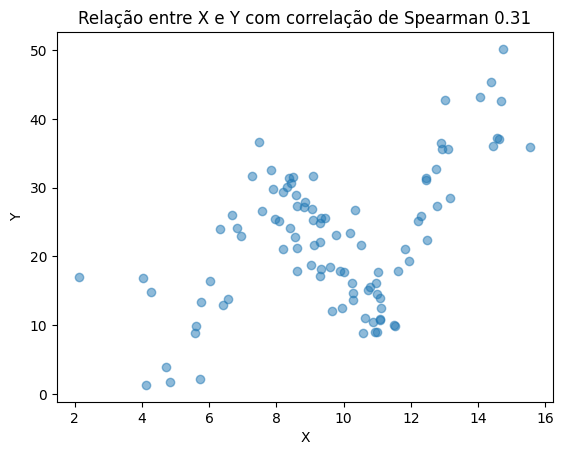

In [44]:
# Gera dados aleatórios
np.random.seed(42)
x = np.random.normal(loc = 10, scale = 3, size = 100)
y = 2 * x + 3 + np.random.normal(loc = 0, scale = 5, size = 100)

# Adiciona ruído não linear para tornar a relação menos linear
y = y + 10 * np.sin(x)

# Calcula a correlação de Spearman
coeficiente, p_valor = spearmanr(x, y)

# Exibe o resultado
print("Coeficiente de correlação de Spearman:", coeficiente)
print("Valor-p:", p_valor)

# Visualiza a relação entre as variáveis
plt.scatter(x, y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Relação entre X e Y com correlação de Spearman {:.2f}".format(coeficiente))
plt.show()

O valor-p de aproximadamente 0.0019 é muito baixo e, tipicamente, um resultado como este seria considerado estatisticamente significativo (normalmente, compara-se com um nível de significância de 0.05 ou 0.01). Isso significa que há evidências estatísticas suficientes para rejeitar a hipótese nula de que não existe correlação monotônica entre as variáveis.

# Métodos de Bootstrapping

O bootstrapping é uma técnica estatística poderosa e versátil que usa a reamostragem com reposição para estimar a distribuição de uma estatística em uma população a partir de uma amostra de dados. Foi introduzida por Bradley Efron na década de 1970 e é usada principalmente para avaliar a variabilidade de uma estimativa (como médias, medianas, proporções) ou para construir intervalos de confiança e testes de hipóteses quando os métodos tradicionais são ineficazes ou inaplicáveis.

Resumo de como a técnica de bootstrapping geralmente funciona:

**Seleção de Amostras**: Dado um conjunto de dados original, amostras repetidas são geradas a partir deste conjunto, selecionando-se aleatoriamente observações com reposição. Isso significa que a mesma observação pode aparecer mais de uma vez na mesma amostra reamostrada.

**Cálculo de Estatísticas:** Para cada amostra reamostrada, uma estatística de interesse é calculada (por exemplo, a média, a mediana, a variância).

**Repetição**: Este processo é repetido um grande número de vezes (tipicamente milhares ou mais) para gerar uma distribuição das estatísticas calculadas.

**Análise de Resultados:** A distribuição das estatísticas reamostradas é então usada para fazer inferências sobre a estatística original. Por exemplo, pode-se estimar o erro padrão da média ou construir um intervalo de confiança.

## Aplicações do Bootstrapping


**Intervalos de Confiança**: Construção de intervalos de confiança para estimativas de parâmetros quando a distribuição da estatística de interesse é desconhecida ou difícil de derivar matematicamente.

**Testes de Hipóteses**: Avaliação da significância estatística de uma estatística sem depender de pressupostos de distribuição.

**Modelo de Avaliação**: Avaliação da robustez e da estabilidade de modelos estatísticos.


## Vantagens e Limitações


**Vantagens**:

- Não requer suposições sobre a forma da distribuição dos dados, o que a torna particularmente útil para dados não normais ou para amostras pequenas.

- Simples de implementar e aplicável a uma ampla variedade de situações estatísticas.

**Limitações**:

- Pode ser computacionalmente intensivo, especialmente para grandes conjuntos de dados ou estatísticas complexas.

- O desempenho do método pode depender do tamanho da amostra original: amostras muito pequenas podem não fornecer uma reamostragem eficaz.

O bootstrapping é uma ferramenta extremamente flexível e útil em estatística, especialmente em casos onde métodos paramétricos tradicionais falham ou são inadequados para aplicação.

# Testes de Adequação de Ajuste Não Paramétricos

Os testes de adequação de ajuste não paramétricos são usados para avaliar se uma amostra de dados segue uma distribuição específica sem assumir previamente uma forma específica para essa distribuição. Diferente dos testes paramétricos, que assumem que os dados seguem uma distribuição conhecida (como a normal) e avaliam os parâmetros dessa distribuição, os testes não paramétricos focam em propriedades gerais dos dados, como a ordem ou os rankings.

Esses testes são particularmente úteis quando você não pode fazer suposições seguras sobre a distribuição dos dados ou quando a amostra é pequena ou inclui dados atípicos que poderiam distorcer os resultados de testes paramétricos.

Aqui estão alguns exemplos comuns de testes de adequação de ajuste não paramétricos:

**Teste de Kolmogorov-Smirnov**: Este teste compara a distribuição empírica de uma amostra com uma distribuição de referência contínua especificada para verificar se ambas as distribuições são equivalentes. Ele é usado tanto para uma amostra (testando contra uma distribuição específica) quanto para duas amostras (comparando se duas amostras independentes são da mesma distribuição).

**Teste de Anderson-Darling**: Semelhante ao teste de Kolmogorov-Smirnov, este teste também compara a distribuição empírica de uma amostra com uma distribuição teórica, mas dá mais peso às caudas da distribuição. Isso o torna mais sensível às diferenças nas extremidades da distribuição.

**Teste de Cramer-von Mises**: Outro teste que compara a função de distribuição cumulativa empírica de uma amostra com a de uma distribuição esperada. Este teste é menos conhecido mas útil para avaliar o ajuste geral dos dados a uma distribuição.

**Teste de Chi-quadrado para Adequação de Ajuste**: Embora possa ser usado como teste paramétrico, também é frequentemente aplicado de forma não paramétrica para avaliar se as frequências observadas em categorias discretas se ajustam a um modelo esperado, sem assumir uma distribuição específica dos dados numéricos.

# Métodos Não Paramétricos de Regressão

Os métodos de regressão não paramétrica são técnicas estatísticas que permitem modelar a relação entre variáveis dependentes e independentes sem assumir uma forma funcional fixa para essa relação. Em outras palavras, eles não especificam a priori a forma matemática da função de regressão, permitindo assim uma modelagem mais flexível que pode se adaptar a qualquer padrão de dados observado. Esses métodos são especialmente úteis quando a relação entre as variáveis é complexa ou desconhecida.

Aqui estão alguns dos métodos de regressão não paramétricos mais comuns:

**Regressão por Kernel**: Este método estima a função de regressão "alisando" os dados. Ele usa uma função chamada kernel para ponderar as observações próximas ao ponto onde a função de regressão é estimada. A largura da banda do kernel, que controla a suavidade da estimativa, é um parâmetro fundamental neste método.

**Regressão de Splines (incluindo Splines Cúbicos)**: Splines são funções definidas por pedaços que são polinômios em cada intervalo e são suaves nas junções entre esses intervalos. A regressão spline envolve a construção de uma função que é um spline e que se ajusta bem aos dados. Splines cúbicos, que usam polinômios de terceiro grau, são particularmente populares.

**Regressão LOESS/LOWESS (Localmente Ponderada de Dispersão Suavizada)**: Este é um método de regressão que combina múltiplas regressões em um enfoque localizado. Para cada ponto de estimativa, a regressão LOESS ajusta uma função de regressão ponderada localmente usando um subconjunto de dados que estão próximos ao ponto de interesse.

**MARS (Modelos Aditivos de Splines Multivariados)**: MARS é uma forma de regressão não paramétrica que automaticamente modela não-linearidades e interações entre variáveis. Ele usa segmentos de linha que são ajustados e combinados de maneira adaptativa para modelar complexidades nos dados.

**Redes Neurais Artificiais**: Estas são técnicas de aprendizado de máquina que podem modelar relações complexas e não-lineares entre as variáveis. Embora não sejam tradicionalmente classificadas como métodos não paramétricos na estatística clássica, elas se enquadram na categoria devido à sua flexibilidade em formar a função de regressão sem uma forma funcional predefinida.

Cada um desses métodos tem suas próprias vantagens e limitações, e a escolha entre eles depende do problema específico, da natureza dos dados e dos objetivos da análise. Os métodos não paramétricos são geralmente mais flexíveis e menos suscetíveis a suposições incorretas sobre a forma da relação entre variáveis, mas podem requerer mais dados e ser computacionalmente mais intensivos.

### Hipóteses Nula e Alternativa

A hipótese nula e a hipótese alternativa são componentes essenciais de um teste de hipóteses, servindo como as afirmações que são testadas com base nos dados coletados.

#### Hipótese Nula (H₀)

A hipótese nula é uma afirmação de que não há diferença ou efeito, ou que qualquer observação é resultado do acaso. Ela representa o cenário de "status quo" ou a afirmação de que a variável independente não tem impacto na variável dependente.
Exemplos de hipótese nula:
Não há diferença na média de salários entre homens e mulheres no mesmo cargo.
Um novo medicamento não tem efeito diferente do placebo no tratamento de uma doença.
A taxa de cliques em um website não varia entre diferentes versões de design.

> A hipótese nula é geralmente a hipótese que o pesquisador tenta refutar ou provar ser improvável com base nos dados. A rejeição da hipótese nula sugere que há evidências estatísticas suficientes para apoiar a hipótese alternativa.

#### Hipótese Alternativa (H₁ ou Ha)

A hipótese alternativa é uma afirmação que contradiz a hipótese nula e é o que o pesquisador realmente deseja provar. Ela indica a presença de um efeito, diferença ou relação.

Exemplos de hipótese alternativa:
- Há uma diferença significativa na média de salários entre homens e mulheres no mesmo cargo.
- Um novo medicamento é mais eficaz que um placebo no tratamento de uma doença.
- A taxa de cliques em um website aumenta com a nova versão do design.

> A hipótese alternativa é aceita quando há evidências suficientes para rejeitar a hipótese nula. Isso não necessariamente "prova" a hipótese alternativa de maneira definitiva, mas indica que os dados são consistentes com essa hipótese sendo verdadeira, dadas as condições do teste.

### Importância no Teste de Hipóteses

A escolha e formulação das hipóteses afetam diretamente a interpretação dos resultados do teste estatístico.

Normalmente, um resultado de teste que leva à rejeição da hipótese nula é considerado um indicativo de um efeito estatisticamente significativo, enquanto que a falha em rejeitar a hipótese nula pode indicar que não há evidência suficiente para suportar a hipótese alternativa, dado o tamanho da amostra e o poder do teste.

### O processo de teste de hipóteses envolve:

- **Coleta de dados**: Realizar experimentos ou coletar dados relevantes.
Escolha do teste estatístico: Dependendo do tipo de dados e da natureza da hipótese, escolhe-se um teste estatístico adequado (como t-teste, ANOVA, teste de qui-quadrado, etc.).

**Definição do nível de significância:** Geralmente, um nível de significância (alfa) de 0.05 é usado, significando que há 5% de probabilidade de rejeitar a hipótese nula quando ela é verdadeira.

- **Cálculo e decisão**: Calcular a estatística do teste a partir dos dados e comparar com um valor crítico para decidir se rejeita ou não a hipótese nula.

> A escolha de aceitar a hipótese nula ou adotar a hipótese alternativa baseia-se na evidência fornecida pelos dados coletados e no nível de significância estabelecido para o teste. A rejeição da hipótese nula não prova a hipótese alternativa, mas indica que os dados são suficientemente fortes para favorecer a hipótese alternativa sobre a nula dentro do nível de confiança estabelecido.